Initial loading of the data of the 10th scenario (https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/). As ma be seen data are not loaded correctly (misaligned features).

In [1]:
import numpy as np
import pandas as pd
from helper_functions.flow_data_discretization import *


names = ['#Date_flow', 'start', 'Durat', 'Prot', 'Src_IP_Addr:Port', 'Dst_IP_Addr:Port', 'Flags', 'Tos', 'Packets', 'Bytes', 'Flows', 'Label']
data = pd.read_csv('./data/capture20110818.pcap.netflow.labeled', header=0, sep='\s+')
data.head()

,Date,flow,start,Durat,Prot,Src,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Flags,Tos,Packets,Bytes,Flows,Label,Labels
0,2011-08-18,10:19:13.328,0.002,TCP,147.32.86.166:33426,->,212.24.150.110:25443,FRPA_,0,4,321,1,Background,NaN,NaN,NaN,NaN,NaN
1,2011-08-18,10:19:13.328,4.995,UDP,82.39.2.249:41915,->,147.32.84.59:43087,INT,0,617,40095,1,Background,NaN,NaN,NaN,NaN,NaN
2,2011-08-18,10:19:13.329,4.996,UDP,147.32.84.59:43087,->,82.39.2.249:41915,INT,0,1290,1909200,1,Background,NaN,NaN,NaN,NaN,NaN
3,2011-08-18,10:19:13.330,0.000,TCP,147.32.86.166:42020,->,147.32.192.34:993,A_,0,1,66,1,Background,NaN,NaN,NaN,NaN,NaN
4,2011-08-18,10:19:13.330,0.000,TCP,212.24.150.110:25443,->,147.32.86.166:33426,FPA_,0,2,169,1,Background,NaN,NaN,NaN,NaN,NaN


Process the loaded dataframe to fix the alignment of data

In [2]:
data.drop(labels=['Src', 'Packets', 'Bytes', 'Flows', 'Label', 'Labels'], axis=1, inplace=True)
data.to_csv('./data/capture20110818.pcap.netflow.labeled.remastered', header=names, index=False)
data.head()

,Date,flow,start,Durat,Prot,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Flags,Tos
0,2011-08-18,10:19:13.328,0.002,TCP,147.32.86.166:33426,212.24.150.110:25443,FRPA_,0,4,321,1,Background
1,2011-08-18,10:19:13.328,4.995,UDP,82.39.2.249:41915,147.32.84.59:43087,INT,0,617,40095,1,Background
2,2011-08-18,10:19:13.329,4.996,UDP,147.32.84.59:43087,82.39.2.249:41915,INT,0,1290,1909200,1,Background
3,2011-08-18,10:19:13.330,0.000,TCP,147.32.86.166:42020,147.32.192.34:993,A_,0,1,66,1,Background
4,2011-08-18,10:19:13.330,0.000,TCP,212.24.150.110:25443,147.32.86.166:33426,FPA_,0,2,169,1,Background


Separation of `Src_IP_Addr:Port` and `Dst_IP_Addr:Port` into separate features for IP addresses and corresponding ports. Concatenate `#Date_flow` and `start` into a single feature `Datetime` an converion to timestamp.

In [3]:
data = pd.read_csv('./data/capture20110818.pcap.netflow.labeled.remastered')
data[['Src_IP_Addr', 'Src_Port']] = data['Src_IP_Addr:Port'].str.split(':', n=1, expand=True)
data[['Dst_IP_Addr', 'Dst_Port']] = data['Dst_IP_Addr:Port'].str.split(':', n=1, expand=True)

data['Datetime'] = data['#Date_flow'].str.cat(data['start'], sep=' ')
data['Datetime'] = pd.to_datetime(data['Datetime'], infer_datetime_format=True)

data.drop(labels=['#Date_flow', 'start', 'Src_IP_Addr:Port', 'Dst_IP_Addr:Port'], axis=1, inplace=True)
data.head()

,Durat,Prot,Flags,Tos,Packets,Bytes,Flows,Label,Src_IP_Addr,Src_Port,Dst_IP_Addr,Dst_Port,Datetime
0,0.002,TCP,FRPA_,0,4,321,1,Background,147.32.86.166,33426,212.24.150.110,25443,2011-08-18 10:19:13.328
1,4.995,UDP,INT,0,617,40095,1,Background,82.39.2.249,41915,147.32.84.59,43087,2011-08-18 10:19:13.328
2,4.996,UDP,INT,0,1290,1909200,1,Background,147.32.84.59,43087,82.39.2.249,41915,2011-08-18 10:19:13.329
3,0.000,TCP,A_,0,1,66,1,Background,147.32.86.166,42020,147.32.192.34,993,2011-08-18 10:19:13.330
4,0.000,TCP,FPA_,0,2,169,1,Background,212.24.150.110,25443,147.32.86.166,33426,2011-08-18 10:19:13.330


NaNs do occur in features `Src_Port` and `Dst_Port` which will not be further utilized for this taks. Hence, no further action is taken.

In [4]:
nans = data.isna().values
np.sum(nans, axis=0)

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0, 374017,      0, 375948,      0])

In [5]:
data.to_pickle('./data/scenario_10.pkl')

Hosts documented as infected and normal in the documentation of the scenario 51 (https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/) 

In [6]:
infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206''147.32.84.207','147.32.84.208','147.32.84.209']

normal_hosts = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36, 147.32.80.9', '147.32.87.11']

Initial conversion of features `Prot` and `Flags` to numeric.

In [7]:
# Storing the mapping used for the conversion, in case we want to revert back 
label_mapping = {}

# Convert currency code in order to 'amount' in a single code

# Convert all the rest columns which are of type 'object'
char_cols = ['Prot', 'Flags']
print(char_cols)

for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])

# Uncomment this line, if you want to see the mapppings for the conversion
label_mapping

['Prot', 'Flags']


{'Prot': Index(['TCP', 'UDP', 'ICMP', 'PIM', 'RTP', 'ARP', 'IPX/SPX', 'RTCP', 'IGMP',
        'IPV6-ICMP', 'IPV6', 'ESP', 'LLC', 'UDT'],
       dtype='object'),
 'Flags': Index(['FRPA_', 'INT', 'A_', 'FPA_', 'PA_', 'URP', '_FSPA', 'S_', 'SPA_',
        'RA_', 'FA_', 'SRPA_', 'R_', 'FSPA_', 'RED', 'SA_', 'URN', 'ECO',
        '_FSA', 'FSRPA_', 'URFIL', 'URH', 'FRA_', 'CON', 'FSA_', 'RPA_',
        '_FSRPA', 'ECR', 'FS_', 'TXD', 'SEC_', 'SR_', 'FSRA_', 'F_', 'URHPRO',
        'NNS', 'SRA_', 'SRC', '_FSRA', 'AC_', 'NRA', 'SPAC_', 'PAC_', 'FSAU_',
        'FSRPAC_', 'URO', 'FRPAC_', 'RC_', 'URNPRO', 'FSPAC_', 'URF', 'FPAC_',
        'FSR_', '_FSPAC', 'FSPAEC_', 'FAU_', 'MAS', 'TST', 'IRR', 'RTS', 'RTA',
        'IRQ', 'UNK', 'MSR', 'TSR', 'SEC', 'ROB', 'MRQ', 'IAH', 'DNQ', 'PTB',
        'PAR', 'WAY', 'PHO', '___', 'AHA', 'NRS', 'MHR', 'UR', 'NNA', 'MRP',
        'TRC', 'DCE', 'SKP', 'DNP', 'URPRE', 'URS', 'URNU', 'URCUT', 'URISO',
        'URHTOS', 'URHU', 'FRAC_', 'SRC_', 'RPA_FRPA'],
  

Initially drop all background flows. Then two dataframes are extracted, `data_infected` where the `Src_IP_Addr` or `Dst_IP_Addr` is equal to the first infected host (147.32.84.165). On the other hand, `data_clean` corresponds to flows where neither the `Src_IP_Addr` nor the `Dst_IP_Addr` is an infected host.

In [8]:
data_nobground = data[data['Label']!= 'Background']

data_nobground['Infected'] = np.logical_or(data_nobground['Src_IP_Addr']==infected_hosts[0], data_nobground['Dst_IP_Addr']==infected_hosts[0])
data_infected = data_nobground[data_nobground['Infected']==1]
data_infected.dtypes

data_clean = data_nobground[np.logical_and(np.isin(data_nobground['Src_IP_Addr'], infected_hosts, invert=True), np.isin(data_nobground['Dst_IP_Addr'], infected_hosts, invert=True))]
# data_clean = data_nobground[np.isin(data_nobground['Src_IP_Addr'], normal_hosts)]

print("Number of infected Netflows: ", len(data_infected))
print("Number of non-infected Netflows: ", len(data_clean))

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Number of infected Netflows:  29526
Number of non-infected Netflows:  388441


## Evaluating representativeness of features

First evaluate mean values and corresponding standard deviations for the various features for `data_infected` and `data_clean`.

In [9]:
cols = ['Durat', 'Prot', 'Flags', 'Tos', 'Flows', 'Packets', 'Flags', 'Bytes']
# cols = ['Packets', 'Flags', 'Bytes']
mean_infected = np.mean(data_infected[cols].values, axis=0)
std_infected = np.std(data_infected[cols].values, axis=0)

mean_clean = np.mean(data_clean[cols].values, axis=0)
std_clean = np.std(data_clean[cols].values, axis=0)

In [10]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

ax[0].plot(mean_infected[:-3], color='r', marker='o', label='infected')
ax[0].fill_between(range(len(mean_infected[:-3])), mean_infected[:-3]-std_infected[:-3], 
                 mean_infected[:-3]+std_infected[:-3], color='r', alpha=0.2)

ax[0].plot(mean_clean[:-3], color='g', marker='o', label='clean')
ax[0].fill_between(range(len(mean_clean[:-3])), mean_clean[:-3]-std_clean[:-3], 
                 mean_clean[:-3]+std_clean[:-3], color='g', alpha=0.2)

ax[0].set_xticks(range(len(cols[:-3]))) 
ax[0].set_xticklabels(cols[:-3], fontsize=12)
ax[0].set_ylabel('Mean value')


ax[1].plot(mean_infected[-3:], color='r', marker='o', label='infected')
ax[1].fill_between(range(len(mean_infected[-3:])), mean_infected[-3:]-std_infected[-3:], 
                 mean_infected[-3:]+std_infected[-3:], color='r', alpha=0.2)

ax[1].plot(mean_clean[-3:], color='g', marker='o', label='clean')
ax[1].fill_between(range(len(mean_clean[-3:])), mean_clean[-3:]-std_clean[-3:], 
                 mean_clean[-3:]+std_clean[-3:], color='g', alpha=0.2)

ax[1].set_xticks(range(len(cols[-3:]))) 
ax[1].set_xticklabels(cols[-3:], fontsize=12)
ax[1].set_ylabel('Mean value')

Text(0, 0.5, 'Mean value')

Text(0, 0.5, 'Mean value')

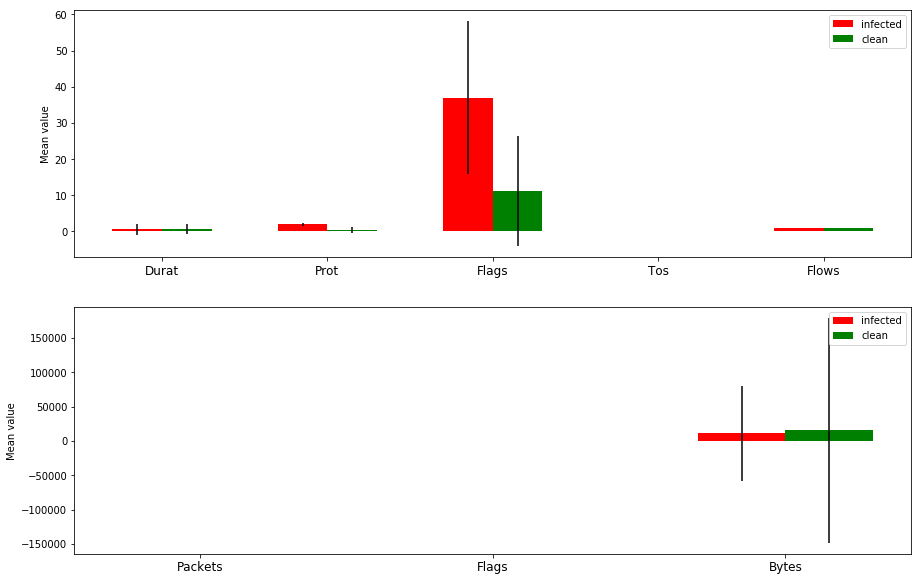

In [12]:
# cols = ['Packets', 'Flags', 'Bytes']
n = len(cols)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

ax[0].bar(np.subtract(range(n-3), 0.15), height=mean_infected[:-3], yerr=std_infected[:-3],
          width=0.3, color='r', label='infected')
ax[0].bar(np.add(range(n-3), 0.15), height=mean_clean[:-3], yerr=std_clean[:-3], 
          width=0.3, color='g', label='clean')
ax[0].legend()
ax[0].set_xticks(range(len(cols[:-3]))) 
ax[0].set_xticklabels(cols[:-3], fontsize=12)
ax[0].set_ylabel('Mean value')

ax[1].bar(np.subtract(range(3), 0.15), height=mean_infected[-3:], yerr=std_infected[-3:],
          width=0.3, color='r', label='infected')
ax[1].bar(np.add(range(3), 0.15), height=mean_clean[-3:], yerr=std_clean[-3:], 
          width=0.3, color='g', label='clean')
ax[1].legend()
ax[1].set_xticks(range(3)) 
ax[1].set_xticklabels(cols[-3:], fontsize=12)
ax[1].set_ylabel('Mean value')

The following is quite an informative figure. It demonstrates the distribution of the protocol feature `Prot` regarding `infected_data` and `clean_data`. Clearly the majority of 'infected' flows correspond to the *'ICMP'* protocol, whereas the *'TCP'* protocol is by far the most frequent one in clean flows. Hence, `Prot` will definitely be one of the two features we will utilise further.

Text(0.5, 1.0, 'Clean')

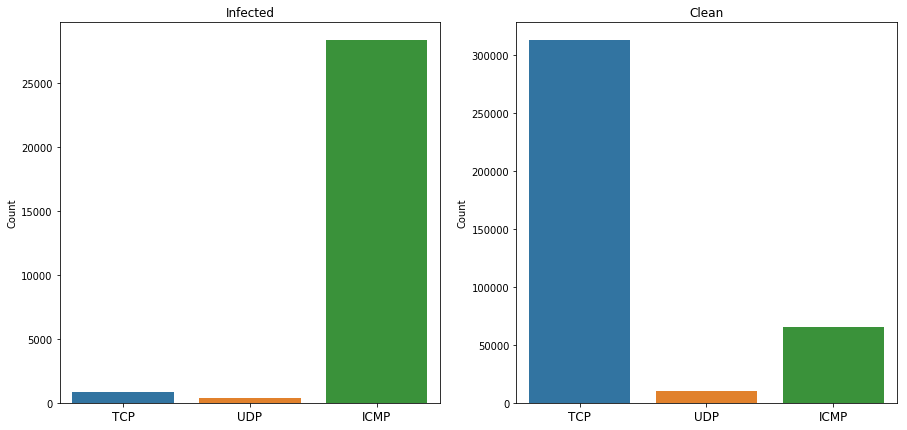

In [13]:
import seaborn as sns

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
cols = list(label_mapping['Prot'])[:3]

inf_prot = data_infected['Prot'].value_counts()
clean_prot = data_clean['Prot'].value_counts()

# plt.title('Chargeback transactions vs Settled')
sns.barplot(x=inf_prot.index, y=inf_prot, ax=ax[0])
sns.barplot(x=clean_prot.index, y=clean_prot, ax=ax[1])

ax[0].set_xticks(range(3)) 
ax[0].set_xticklabels(cols, fontsize=12)
ax[0].set_ylabel('Count')
ax[0].set_title('Infected')

ax[1].set_xticks(range(3)) 
ax[1].set_xticklabels(cols, fontsize=12)
ax[1].set_ylabel('Count')
ax[1].set_title('Clean')

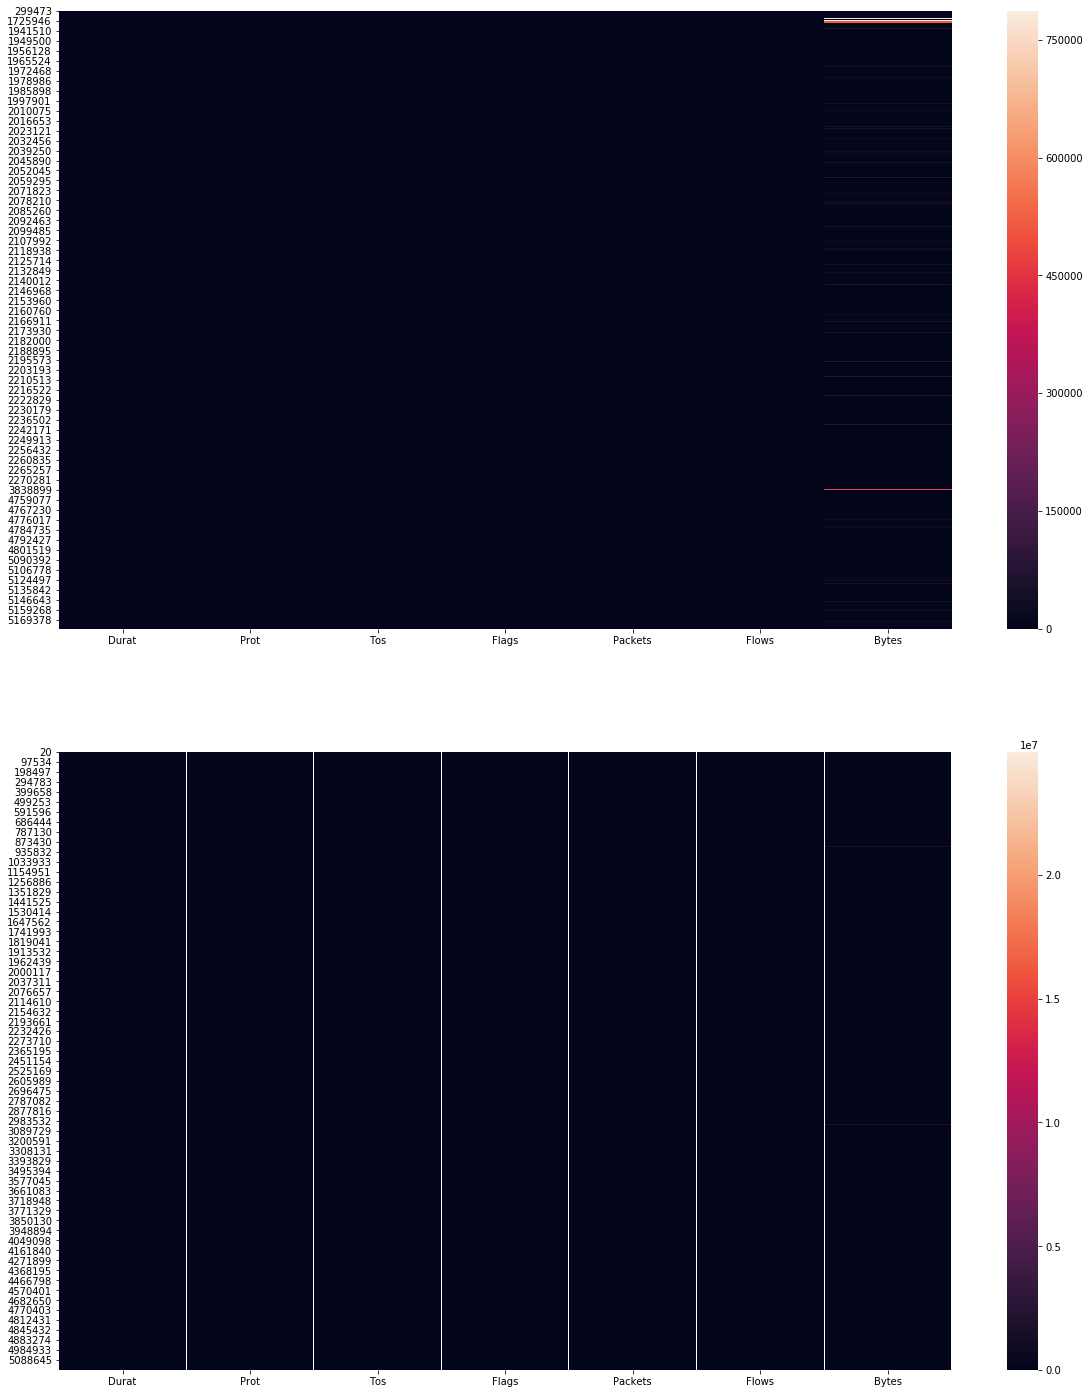

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

columns = ['Durat', 'Prot', 'Tos', 'Flags', 'Packets', 'Flows', 'Bytes']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,25))    
sns.heatmap(data_infected[columns], ax=ax[0])
sns.heatmap(data_clean[columns], ax=ax[1])

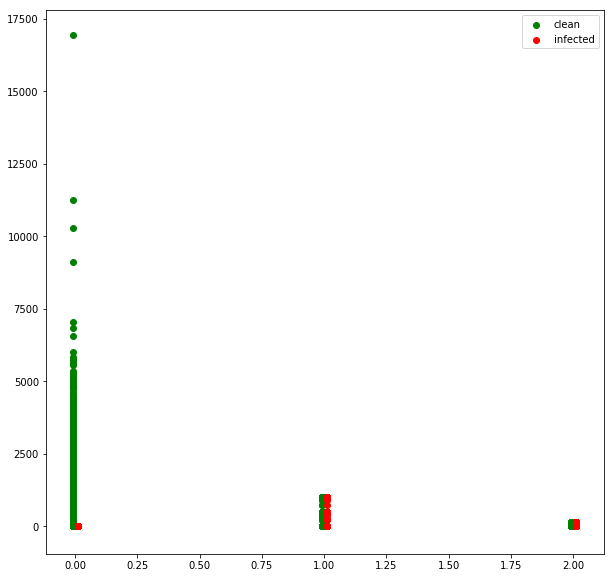

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(data_clean['Prot'].values-0.01, data_clean['Packets'].values, color='g', label='clean')
plt.scatter(data_infected['Prot'].values+0.01, data_infected['Packets'].values, color='r', label='infected')
plt.legend()

Here we utilized silhouette scores, in order to detect the set of two features yielding the most separable clusters for classes `Infected` and `Normal`. For further info please refer to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html. **NOTE**: this method takes quite some time to run, thus we do save and provide the results in a dictionary.

For this approach to be utilized feature scaling is applied. Scaling is essential for applying the clustering step of the method.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

cols = ['Durat', 'Prot', 'Flags', 'Tos', 'Flows', 'Packets', 'Bytes']
n = len(cols)
values_infected = data_infected[cols].values
values_clean = data_clean[cols].values

ss = StandardScaler()
X = np.append(values_infected, values_clean, axis=0)
X = ss.fit_transform(X)

data_infected_norm = data_infected.copy()
data_clean_norm = data_clean.copy()

data_infected_norm[cols] = X[:len(values_infected), :]
data_clean_norm[cols] = X[len(values_infected):, :]


labels = np.append(np.ones(len(values_infected), dtype=int), np.zeros(len(data_clean), dtype=int), axis=0)

# sil = {}
# for i in range(n):
#     for j in range(i+1, n):
#         if i==j:
#             continue
#         s = silhouette_score(X[:, [i,j]], labels)
#         sil[f'{cols[i]}-{cols[j]}'] = s

In [45]:
import json

with open('./data/silhouette_scores.json', 'w') as f:
    json.dump(sil, f)

print(sil)

{'Durat-Prot': 0.5876277199755483, 'Durat-Flags': 0.3735273324275417, 'Durat-Tos': 0.06640404722484311, 'Durat-Flows': 0.06640404722484311, 'Durat-Packets': 0.06468628043845238, 'Durat-Bytes': 0.08865405412973713, 'Prot-Flags': 0.6320117659970925, 'Prot-Tos': 0.770136075321158, 'Prot-Flows': 0.770136075321158, 'Prot-Packets': 0.7330095585705004, 'Prot-Bytes': 0.729777676349527, 'Flags-Tos': 0.48904440569688884, 'Flags-Flows': 0.48904440569688884, 'Flags-Packets': 0.4674115688937589, 'Flags-Bytes': 0.45981430644519167, 'Tos-Flows': 0.0, 'Tos-Packets': 0.06678206814303951, 'Tos-Bytes': 0.15189359322910412, 'Flows-Packets': 0.06678206814303951, 'Flows-Bytes': 0.15189359322910412, 'Packets-Bytes': 0.12180570584834904}


In [35]:
import json

with open('./data/silhouette_scores.json') as f:
    sil = json.load(f)

scores= list(sil.values())
max_ind = np.argmax(scores)
print(f'Max: {scores[max_ind]}, for {list(sil.keys())[max_ind]}')

Max: 0.770136075321158, for Prot-Tos


In [48]:
comm_hosts = []

hosts = data_nobground[data_nobground['Src_IP_Addr']==infected_hosts[0]]['Dst_IP_Addr'].values
comm_hosts.append(hosts)

hosts = data_nobground[data_nobground['Dst_IP_Addr']==infected_hosts[0]]['Src_IP_Addr'].values
comm_hosts.append(hosts)
comm_hosts = [x for sublist in comm_hosts for x in sublist]
# np.unique(comm_hosts)

df = pd.DataFrame(comm_hosts, columns=['IP_Addr'])
df.groupby('IP_Addr').size()

IP_Addr
121.11.80.162          1
140.211.167.98         3
147.32.80.9           36
147.32.96.45         142
147.32.96.69       28662
187.78.6.63            3
195.113.232.75         3
211.140.164.103        2
60.11.14.251           3
65.55.56.40            4
74.125.232.197         2
74.125.232.199         2
74.125.232.206         2
74.125.232.207         2
78.37.60.52            3
78.40.125.4          107
82.96.64.4            89
85.190.0.3           414
86.65.39.15           46
dtype: int64

### Discretization
For discretizing the feature `Packets` we made use of clustering and the elbow method. The elbow reveals the number of clusters to be utilized, where a big change occurs in the inertia (sum of squared distances). Since a single feature is considered, scaling is not necessary.

From the following plot, clearly the number of clusters should be 2 or 3. Actually, setting the number of clusters to 3 does not have an actual impact to the subsequent ordinal discretization (ordinal values are 1 and [1,1] for 2 and 3 clusters respectively). Hence, we will set the number of clusters to 2.

Text(0, 0.5, 'Sum of squared distances')

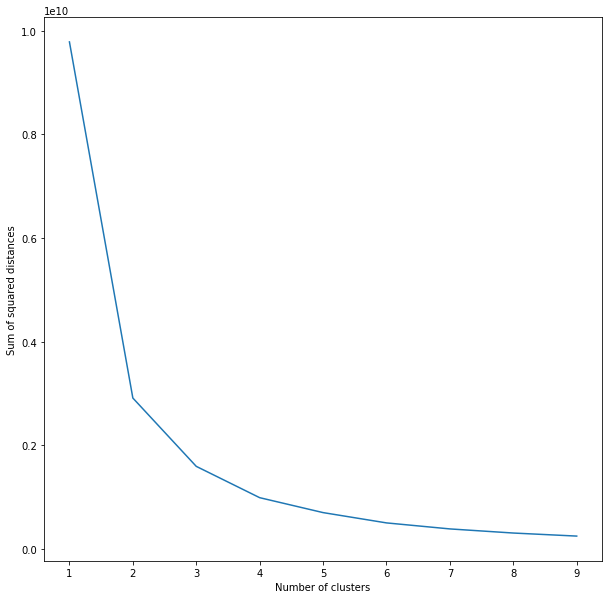

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

num_clusters = np.arange(1,10, dtype=int)
val = data_nobground['Packets'].values

inertia = []
for n in num_clusters:
    km = KMeans(n, n_jobs=-1)
    km.fit(val[...,np.newaxis])
    inertia.append(km.inertia_)

plt.figure(figsize=(10,10))
plt.plot(num_clusters, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

Discretize packets and add the new feature `Disc_Packets` to the dataframe. Ordinal discretization is performed as in https://ieeexplore.ieee.org/abstract/document/7987293.

For further info on the used helper functions, please refer to `helper_functions/flow_data_discretization.py`.

In [16]:
pack_disc = discretize_ordinal(val, 2)
data_nobground['Disc_Packets'] = pack_disc

/home/ilele/.conda/envs/cda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Using the features `Prot` and `Disc_Packets` we next extract the respective code values as done in https://ieeexplore.ieee.org/abstract/document/7987293, for data from the first infected and normal host. We will look into for potential differences in the extracted codes.

In [22]:
feat = ['Prot', 'Disc_Packets']

infected_data = data_nobground[np.logical_or(data_nobground['Src_IP_Addr']==infected_hosts[0], data_nobground['Dst_IP_Addr']==infected_hosts[0])]
infected_data = infected_data[feat].values
infected_code, _ = extract_code(infected_data)

clean_data = data_nobground[np.logical_or(data_nobground['Src_IP_Addr']==normal_hosts[0], data_nobground['Dst_IP_Addr']==normal_hosts[0])][feat].values
test_code,_ = extract_code(clean_data)

As seen in the following plot malicious-infected data yield higher code values, hence this could be exploited for classifying unseen host data as malicious or normal. This is part of the following, Botnet profiling task.

Text(0, 0.5, 'Extracted code')

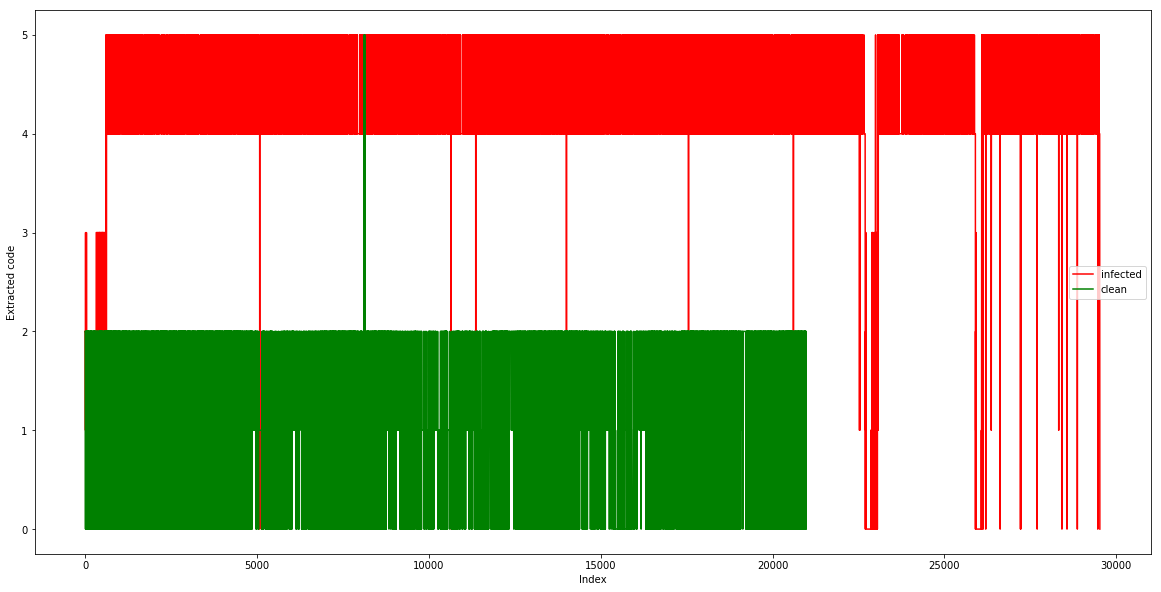

In [23]:
plt.figure(figsize=(20,10))
plt.plot(infected_code, color='r', label='infected')
plt.plot(test_code, color='g', label='clean')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Extracted code")